## Author
+ Name: Jahid Hasan
+ 𝐏𝐡𝐨𝐧𝐞:   (+880) 1772905097 (Whatsapp)
+ 𝘔𝘢𝘪𝘭:     jahidnoyon36@gmail.com
+ LinkedIn: http://linkedin.com/in/hellojahid


In [1]:
# Import Module
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.datasets import make_circles

In [2]:
# Create Dataset
n_points = 500
x, y = make_circles(n_samples=n_points, random_state=123, noise=0.1, factor=0.2)

xdata = torch.Tensor(x)
ydata = torch.Tensor(y.reshape(n_points, 1))

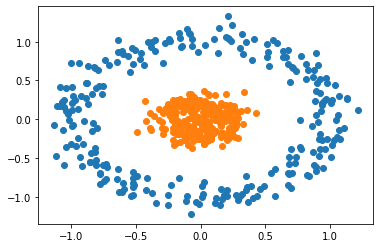

In [3]:
# plotting data
def scatter_plot():
    plt.scatter(x[y==0,0], x[y==0, 1])
    plt.scatter(x[y==1,0], x[y==1, 1])
    plt.show()

scatter_plot()


In [4]:
# Class of Fully connected network
class DCN(nn.Module):

    def __init__(self, input_size, h1, h2, output_size):
        super(DCN, self).__init__()

        # DCN layer
        self.FCN1 = nn.Linear(input_size, h1)
        self.FCN2 = nn.Linear(h1, h2)
        self.FCN_OUTPUT = nn.Linear(h2, output_size)


    # build model and compute output from input
    def forward(self, input):
        layer1 = torch.relu(self.FCN1(input))
        layer2 = torch.relu(self.FCN2(layer1))

        output = torch.sigmoid(self.FCN_OUTPUT(layer2))

        return output

    # model prediction function
    def predict(self, data):
        pred = self.forward(data)

        if pred >= 0.5:
            return 1
        else:
            return 0

In [7]:
# create Deep_neural_network
model = DCN(input_size=2, h1=32, h2=16, output_size=1)
print(model)

# loss and  OPTIMIZER
model_loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# model parameters
def get_parameters(model):
    [m, b] = model.parameters()
    m1, m2 = m.view(2)
    b1 = b[0]

    return(m1.item(), m2.item(), b1.item())

# traning the model
loss_list = list()
EPOCHS = 20000

for e in range(EPOCHS):
    # set gradient to zero
    optimizer.zero_grad()


    # fit model
    ypred = model.forward(xdata)
    loss = model_loss(ypred, ydata) # calculate loss
    loss.backward()  # calculate gradient
    optimizer.step()  # update the weight based on gradient

    loss_list.append(loss)

    print("EPOCHS: {}, Loss: {}".format(e+1, loss.item()))

Red point positive probability=0.6579696536064148
Red point in calss=1


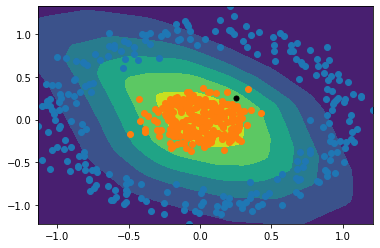

In [6]:
# plot decision boundary
def plot_decision_boundary(x, y):
    x_span=np.linspace(min(x[:,0]),max(x[:,0]))
    y_span=np.linspace(min(x[:,1]),max(x[:,1]))
    xx,yy=np.meshgrid(x_span,y_span)
    grid=torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
    pred_func=model.forward(grid)
    z=pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx,yy,z)


# Test new point
z1=0.25
z2=0.25
p1=torch.Tensor([z1,z2])
plt.plot(p1.numpy()[0],p1.numpy()[1],marker='o',markersize=5,color='black')
print("Red point positive probability={}".format(model.forward(p1).item()))
print("Red point in calss={}".format(model.predict(p1)))
plot_decision_boundary(x,y)
scatter_plot()
plt.show()